**Problem Statement** : We've been given a dataset of photos of logos from well-known brands , and we need to categorise them under their respective labels.

The brands included in the dataset are: Adidas, Apple, BMW, Citroen, Coca Cola, DHL, Fedex, Ferrari, Ford, Google, Heineken, HP, McDonalds, Mini, Nbc, Nike, Pepsi, Porsche, Puma, Red Bull, Sprite, Starbucks, Intel, Texaco, Unisef, Vodafone and Yahoo.




<br>

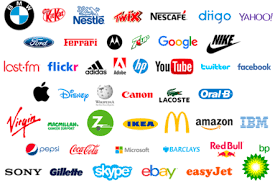

## IMPORTING LIBRARIES

In [5]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML

## Unzip the dataset so that we can use it in our notebook

In [2]:
!unzip '/content/drive/MyDrive/data/logo prediction /logos3.zip'

Archive:  /content/drive/MyDrive/data/logo prediction /logos3.zip
   creating: logos3/
  inflating: __MACOSX/._logos3       
  inflating: logos3/.DS_Store        
  inflating: __MACOSX/logos3/._.DS_Store  
   creating: logos3/test/
  inflating: __MACOSX/logos3/._test  
   creating: logos3/train/
  inflating: __MACOSX/logos3/._train  
   creating: logos3/test/Starbucks/
  inflating: __MACOSX/logos3/test/._Starbucks  
   creating: logos3/test/McDonalds/
  inflating: __MACOSX/logos3/test/._McDonalds  
   creating: logos3/test/Burger King/
  inflating: __MACOSX/logos3/test/._Burger King  
  inflating: logos3/test/.DS_Store   
  inflating: __MACOSX/logos3/test/._.DS_Store  
   creating: logos3/test/Other/
  inflating: __MACOSX/logos3/test/._Other  
   creating: logos3/test/KFC/
  inflating: __MACOSX/logos3/test/._KFC  
   creating: logos3/test/Subway/
  inflating: __MACOSX/logos3/test/._Subway  
   creating: logos3/train/Starbucks/
  inflating: __MACOSX/logos3/train/._Starbucks  
   creatin

In [3]:
directory = "logos3/train"

### Map the classifications i.e. classes to an integer and display the list of all unique 6 brands.

In [6]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['.DS_Store', 'Starbucks', 'Burger King', 'McDonalds', 'KFC', 'Subway', 'Other']
7


In [7]:
brand_map = dict(zip(Name, [t for t in range(len(Name))]))
print(brand_map)
r_brand_map=dict(zip([t for t in range(len(Name))],Name)) 

{'.DS_Store': 0, 'Starbucks': 1, 'Burger King': 2, 'McDonalds': 3, 'KFC': 4, 'Subway': 5, 'Other': 6}


## Displaying some images from our dataset.

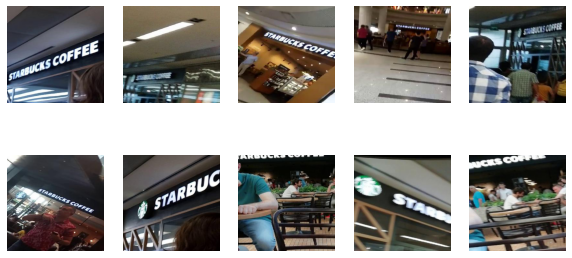

In [8]:
Brand = 'logos3/train/Starbucks'
import os 
sub_class = os.listdir(Brand)

fig = plt.figure(figsize=(10,5))
for e in range(len(sub_class[:10])):
    plt.subplot(2,5,e+1)
    img = plt.imread(os.path.join(Brand,sub_class[e]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.axis('off')

**SInce the data we have are not enough we need to generate ie data augmentation is required for generating more sets of data.**

In [9]:
img_datagen = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = img_datagen.flow_from_directory(directory,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

Found 1393 images belonging to 6 classes.


### Divide the training dataset into train set and validation set.

In [12]:
valid_generator = img_datagen.flow_from_directory(directory,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 345 images belonging to 6 classes.


## Train a sequential model.

In [18]:
model=tf.keras.Sequential([
            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),input_shape=(100,100,3), activation='relu', padding = 'same'),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256,activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(6,activation='softmax'),
])

In [19]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
history = model.fit(train_generator, validation_data=valid_generator,batch_size= 32,epochs=50)

Epoch 1/50
44/44 [==============================] - 8s 166ms/step - loss: 1.5176 - accuracy: 0.4587 - val_loss: 1.3948 - val_accuracy: 0.4783
Epoch 2/50
44/44 [==============================] - 7s 164ms/step - loss: 1.2855 - accuracy: 0.5190 - val_loss: 1.3082 - val_accuracy: 0.5275
Epoch 3/50
44/44 [==============================] - 7s 159ms/step - loss: 1.1285 - accuracy: 0.5865 - val_loss: 1.0307 - val_accuracy: 0.6145
Epoch 4/50
44/44 [==============================] - 8s 188ms/step - loss: 1.0357 - accuracy: 0.6045 - val_loss: 1.2554 - val_accuracy: 0.5449
Epoch 5/50
44/44 [==============================] - 7s 159ms/step - loss: 0.9650 - accuracy: 0.6231 - val_loss: 0.9654 - val_accuracy: 0.6319
Epoch 6/50
44/44 [==============================] - 7s 158ms/step - loss: 0.9667 - accuracy: 0.6403 - val_loss: 1.0049 - val_accuracy: 0.6087
Epoch 7/50
44/44 [==============================] - 7s 159ms/step - loss: 0.8812 - accuracy: 0.6669 - val_loss: 0.7474 - val_accuracy: 0.7652
Epoch 

# Plot curves

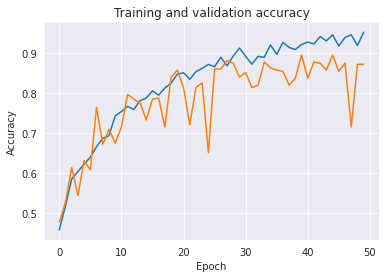

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.show()

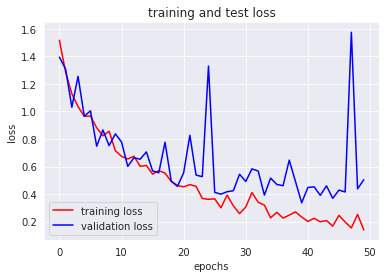

In [22]:
training_accuracy = history.history['loss']
validation_accuracy = history.history['val_loss']
plt.plot(training_accuracy, 'r', label = 'training loss')
plt.plot(validation_accuracy, 'b', label = 'validation loss')
plt.title('training and test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Making Predictions

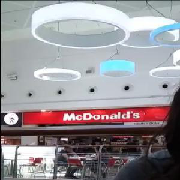

In [23]:
# from tensorflow.keras.models import load_img
from tensorflow.keras.preprocessing.image import load_img
load_img("logos3/test/McDonalds/armada_image_755.jpg",target_size=(180,180))

In [27]:
# from tensorflow.keras import image
from tensorflow.keras.preprocessing import image
test_image = image.load_img('logos3/test/McDonalds/armada_image_755.jpg', target_size = (100, 100))  
test_image = image.img_to_array(test_image)  
test_image = np.expand_dims(test_image, axis = 0)  
brands=['kfc', 'macdonalds', 'Burger King', 'starbucks', 'dsstore', 'Subway', 'Other']
result = brands[np.argmax(model.predict(test_image))] 

print(result)

macdonalds
